# Apollo Lunar Module

In [6]:
import numpy as np
import sympy as sy
sy.init_printing()

In [2]:
!pip install sympy

     |████████████████████████████████| 6.2 MB 522 kB/s eta 0:00:01
     |████████████████████████████████| 532 kB 222 kB/s eta 0:00:01
You should consider upgrading via the '/home/kjartan/.pyenv/versions/3.8.11/envs/tug/bin/python3.8 -m pip install --upgrade pip' command.


In [74]:
s = sy.symbols('s', real=False)
J, g = sy.symbols('J, g', real=True, positive=True)


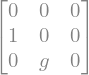

In [75]:
A = sy.Matrix([[0,0,0],[1,0,0],[0,g,0]])
B = sy.Matrix([[1/J],[0],[0]])
C = sy.Matrix([[0,0,1]])
A

## Controllability

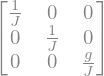

In [60]:
Ctr = sy.Matrix([[B.T], [B.T*A.T], [B.T*A.T*A.T]]).T
Ctr

In [45]:
l0, l1, l2, l3 = sy.symbols('l_0, l_1, l_2, l_3') 
L = sy.Matrix([[l1, l2, l3]])
L

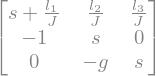

In [46]:
M = s*sy.eye(3) - (A-B*L)
M

In [47]:
char_pol = sy.poly(sy.det(M), s)

## Desired closed-loop poles

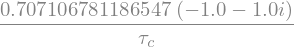

In [48]:
tauc = sy.symbols('tau_c')
wc = 1/tauc
p1 = -wc
p2 = wc/np.sqrt(2)*complex(-1,1)
p3 = wc/np.sqrt(2)*complex(-1, -1)
p3

In [49]:
char_pol_des = sy.poly((s-p1)*(s-p2)*(s-p3), s)

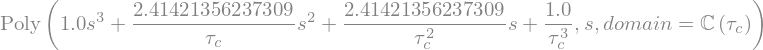

In [50]:
char_pol_des

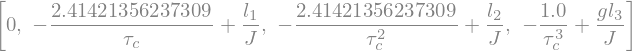

In [51]:
eqns = [c_ - cd_ for c_, cd_ in zip(char_pol.coeffs(), char_pol_des.coeffs())]
eqns

In [52]:
sol = sy.solve(eqns, [l1, l2, l3])

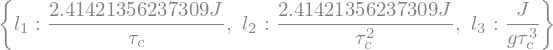

In [53]:
sol

In [54]:
2*np.sqrt(2)

## The forward gain $l_0$

From transfer function
$$ G_c(s) = l_0 \frac{\frac{g}{J}}{s^3 + \frac{1+\sqrt{2}}{\tau_c}s^2 + \frac{1+\sqrt{2}}{\tau_c^2}s + \frac{1}{\tau_c^3}}$$
and 
$$ G_c(0) = 1 $$

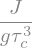

In [57]:
l0 = J/g/tauc**3
l0

From steady-state solution
$$ 0 = (A-BL)x + l_0Br $$
$$ x = -l_0(A-BL)^{-1}Br $$

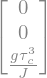

In [63]:
dcgainx = -(A-B*L).inv()*B
dcgainx = dcgainx.subs([(l3, sol[l3])])
dcgainx

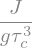

In [66]:
dcgainy = C*dcgainx
l0 = 1/dcgainy[0]
l0

## Observer design


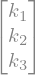

In [68]:
k1,k2,k3 = sy.symbols('k_1, k_2, k_3')
K = sy.Matrix([k1,k2,k3])
K

In [76]:
o_char_pol = sy.poly(sy.det(s*sy.eye(3) - (A - K*C) ), s)
o_char_pol

### Desired observer poles
Separation of n, hence the poles are at n times the distance from the origin of the closed-loop poles

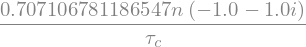

In [81]:
sep = sy.symbols('n', real=True, positive=True)
wc_o = sep*wc
p1_o = -wc_o
p2_o = wc_o/np.sqrt(2)*complex(-1,1)
p3_o = wc_o/np.sqrt(2)*complex(-1, -1)
p3_o

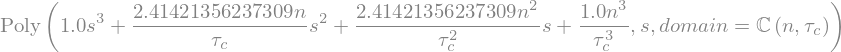

In [82]:
o_char_pol_des = sy.poly((s-p1_o)*(s-p2_o)*(s-p3_o), s)
o_char_pol_des

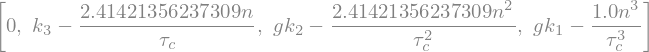

In [83]:
eqns = [c_ - cd_ for c_, cd_ in zip(o_char_pol.coeffs(), o_char_pol_des.coeffs())]
eqns

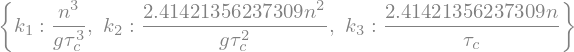

In [84]:
sol_o = sy.solve(eqns, [k1, k2, k3])
sol_o

In [85]:
C

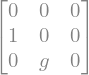

In [86]:
A

In [87]:
B